# 7.3.3 Writing your own callbacks

In [1]:
# on_epoch_begin(epoch, logs)
# on_epoch_end(epoch, logs)
# on_batch_begin(batch, logs)
# on_batch_end(batch, logs)
# on_train_begin(logs)
# on_train_end(logs)

In [3]:
from tensorflow import keras
from matplotlib import pyplot as plt

In [4]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs):
        plt.clf() # clear figure
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

In [5]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28, ))
    features = keras.layers.Dense(512, activation='relu')(inputs)
    features = keras.layers.Dropout(0.5)(features)
    outputs = keras.layers.Dense(10, activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

In [6]:
from keras.datasets import mnist
(images, labels), (test_images, test_labels) = mnist.load_data()

In [7]:
images = images.reshape((60000, 28 * 28)).astype('float32') / 255

In [8]:
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [9]:
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [11]:
import warnings

In [16]:
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

In [20]:
warnings.filterwarnings(action="ignore", category=Warning)

In [21]:
model = get_mnist_model()

In [22]:
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9813 - val_loss: 0.0886 - val_accuracy: 0.9799
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9829 - val_loss: 0.0871 - val_accuracy: 0.9811
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0626 - accuracy: 0.9828 - val_loss: 0.0844 - val_accuracy: 0.9822
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0576 - accuracy: 0.9846 - val_loss: 0.0896 - val_accuracy: 0.9818
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9844 - val_loss: 0.0882 - val_accuracy: 0.9825
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9858 - val_loss: 0.0807 - val_accuracy: 0.9832
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0522 - accuracy: 0.9868 - val_loss: 0.0864 - val_accuracy:

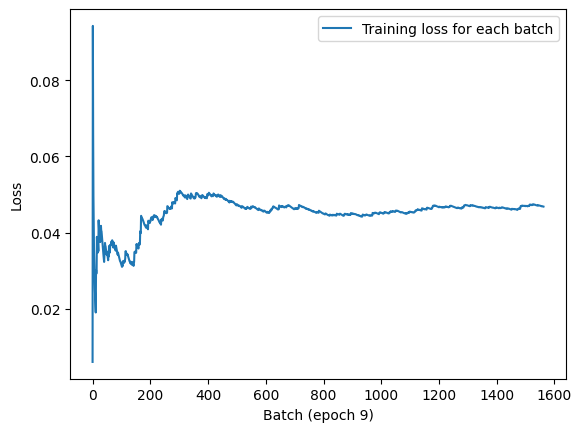

In [24]:
model.fit(train_images, train_labels,
         epochs=10,
         callbacks=[LossHistory()],
         validation_data=(val_images, val_labels))